In [325]:
import pandas as pd
import numpy as np 
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import string

In [326]:
df=pd.read_csv('spam.csv', sep=',',  encoding='latin-1')

df.drop_duplicates(inplace=True)

In [327]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [328]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [329]:
df.head()


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [330]:
# df['target']=df2['target']

In [331]:
# df.rename(columns={'text':'text','label_num':'target'},inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [332]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df['target']=lr.fit_transform(df['target'])
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [333]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
stopwords_list=stopwords.words('english')
ex=string.punctuation



In [334]:
def PreProcessing(text):
    text=text.lower()
    text=word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]        
    y.clear()
    for word in text:
        if word  not in stopwords_list and i not in ex:
            y.append(word)
    text=y[:]        
    y.clear()   
    for word in text:
        y.append(ps.stem(word))    
            
    return ' '.join(y)

In [335]:
df.drop_duplicates(inplace=True)
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [336]:
df['num_characters']=df['text'].apply(len)
df.sample(5)

,target,text,num_characters
2581,0,Yup i'm elaborating on the safety aspects and ...,65
3738,0,Did you stitch his trouser,26
1581,0,Hhahhaahahah rofl wtf nig was leonardo in your...,64
4887,0,You have to pls make a note of all she.s expos...,166
1292,0,Da my birthdate in certificate is in april but...,174


In [337]:
from nltk.tokenize import word_tokenize,sent_tokenize

df['num_words']=df['text'].apply(lambda x:len(word_tokenize(x)))


In [338]:
df['num_sen']=df['text'].apply(lambda x:len(sent_tokenize(x)))

In [339]:
df.sample(5)

,target,text,num_characters,num_words,num_sen
2663,1,8007 FREE for 1st week! No1 Nokia tone 4 ur mo...,165,33,2
4484,0,What not under standing.,24,5,1
2589,1,Join the UK's horniest Dogging service and u c...,153,32,4
876,0,Are you in castor? You need to see something,44,10,2
4046,1,"Thanks for your ringtone order, reference numb...",156,25,2


In [340]:
import seaborn as sns
import matplotlib.pyplot as plt

df[df['target']==1][['num_characters','num_words','num_sen']].describe()

,num_characters,num_words,num_sen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [341]:
df[df['target']==0][['num_characters','num_words','num_sen']].describe()

,num_characters,num_words,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

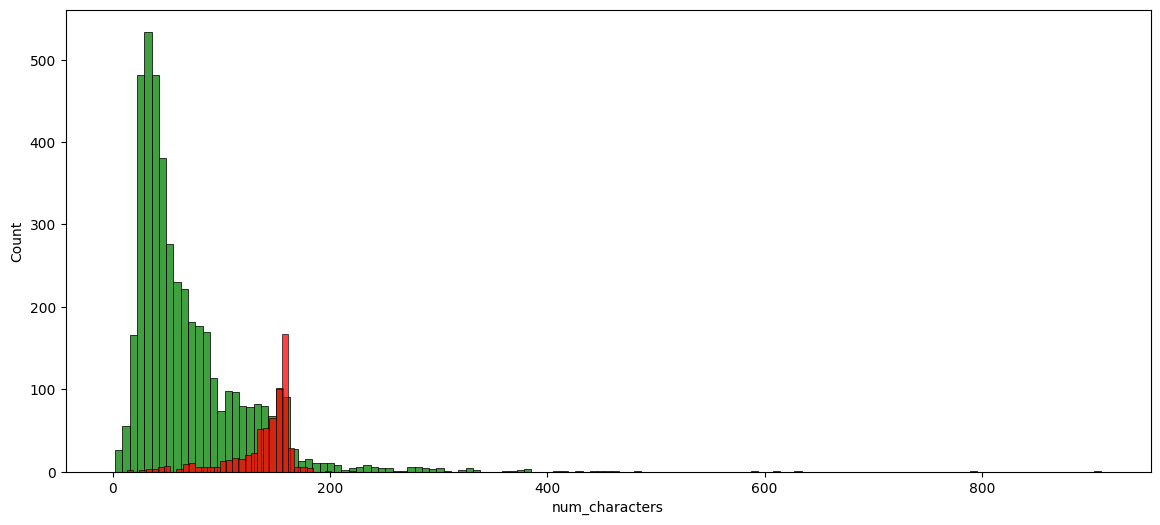

In [342]:
plt.figure(figsize=(14,6))
sns.histplot(df[df['target']==0]['num_characters'],color='green',)
sns.histplot(df[df['target']==1]['num_characters'],color='red')

,target,text,num_characters,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


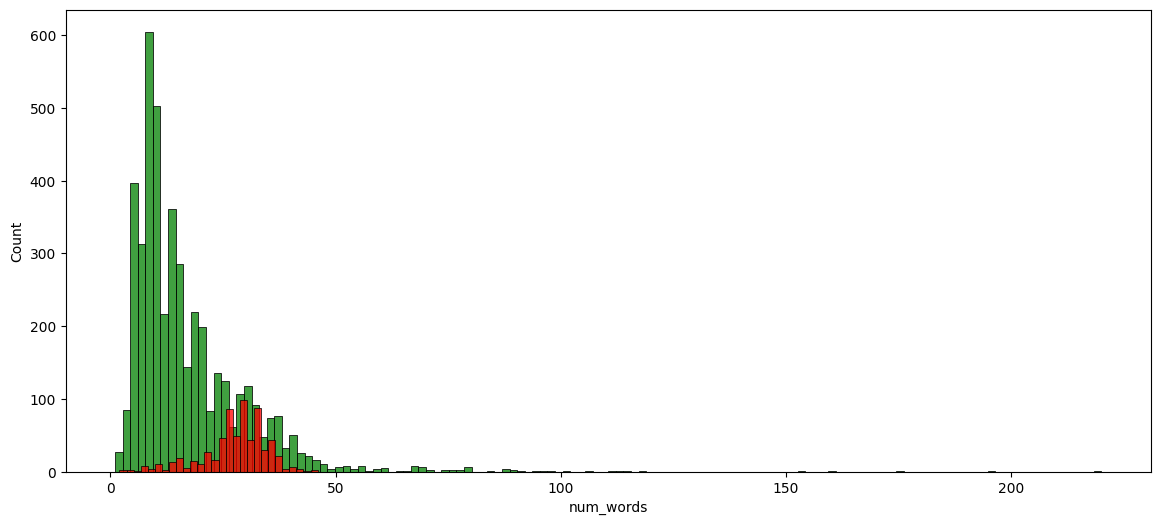

In [343]:
plt.figure(figsize=(14,6))
sns.histplot(df[df['target']==0]['num_words'],color='green',)
sns.histplot(df[df['target']==1]['num_words'],color='red')
df.head()

<Axes: >

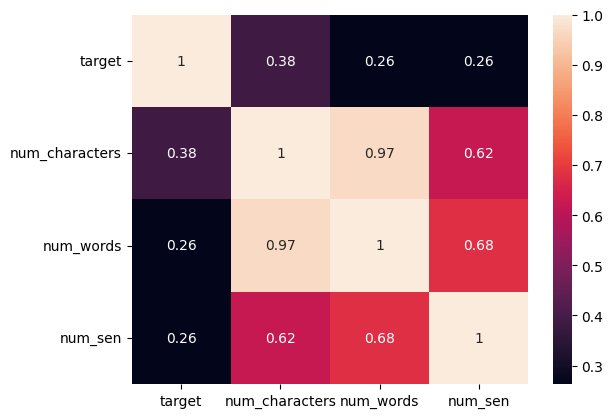

In [344]:
sns.heatmap(df[['target','num_characters','num_words','num_sen']].corr(),annot=True)

In [345]:
df['TransFormedText']=df['text'].apply(PreProcessing)

In [346]:
a=(df['text'].apply(len).sum())
b=(df['TransFormedText'].apply(len).sum())

In [347]:
a/b

3.0878388599782163

In [348]:
from wordcloud import WordCloud

In [349]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set3', stopwords=["date"])

In [350]:
spam_wc=wordcloud.generate_from_text(df[df['target']==1]['TransFormedText'].str.cat(sep=' '))

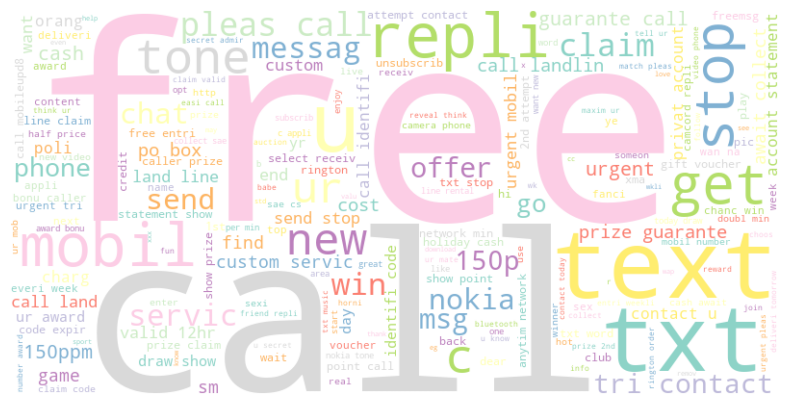

In [351]:
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [352]:
ham_wc=wordcloud.generate_from_text(df[df['target']==0]['TransFormedText'].str.cat(sep=' '))

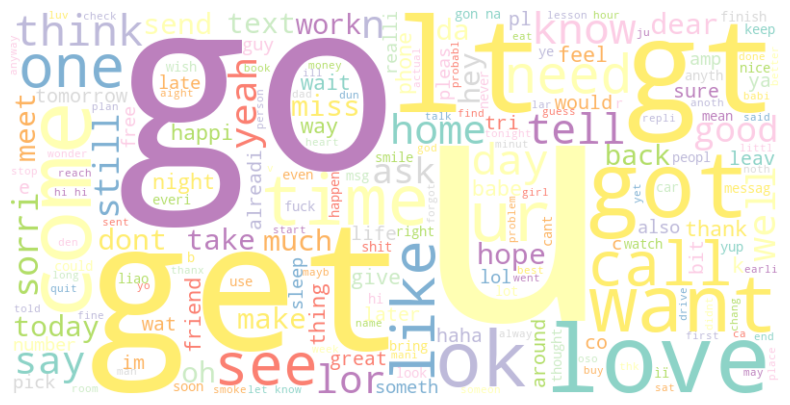

In [353]:
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [354]:
spam_corpus=[]
for message in df[df['target']==1]['TransFormedText'].tolist():
    for word in message.split():
        spam_corpus.append(word)   
len(spam_corpus)                  

7932

In [355]:
ham_corpus=[]
for message in df[df['target']==0]['TransFormedText'].tolist():
    for word in message.split():
        ham_corpus.append(word)   
len(ham_corpus)   

17399

In [356]:
from collections import Counter

In [357]:
Counter(ham_corpus).most_common(30)

[('u', 407),
 ('go', 197),
 ('get', 166),
 ('lt', 146),
 ('gt', 143),
 ('come', 126),
 ('got', 125),
 ('love', 124),
 ('2', 120),
 ('know', 119),
 ('ok', 111),
 ('want', 111),
 ('call', 111),
 ('like', 103),
 ('time', 96),
 ('ur', 96),
 ('one', 91),
 ('good', 90),
 ('see', 89),
 ('need', 89),
 ('think', 82),
 ('day', 81),
 ('4', 78),
 ('home', 75),
 ('tell', 75),
 ('hi', 73),
 ('lor', 72),
 ('take', 70),
 ('say', 65),
 ('back', 65)]

In [358]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)


In [359]:
x=tfidf.fit_transform(df['TransFormedText']).toarray()


In [360]:
y=df['target'].values

In [361]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [362]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
gn=GaussianNB()
bn=BernoulliNB()
mn=MultinomialNB()
gn.fit(x_train,y_train)
bn.fit(x_train,y_train)
mn.fit(x_train,y_train)

MultinomialNB()

In [363]:
y_pred=gn.predict(x_test)
y_pred2=mn.predict(x_test)
y_pred3=bn.predict(x_test)

In [364]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score



In [365]:
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9468085106382979
[[896   0]
 [ 55  83]]
1.0


In [366]:
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9593810444874274
[[887   9]
 [ 33 105]]
0.9210526315789473


In [367]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.48549323017408125
[[378 518]
 [ 14 124]]
0.19314641744548286


In [368]:
import pickle

In [370]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mn,open('model.pkl','wb'))